# Deephyper analytics - hyperparameter search study
**path to data file**: /lus/theta-fs0/projects/datascience/foremans/sdl_workshop/sdl_ai_workshop/03_distributedHyperOpt/01_BasicHPS/db/data/mnist_hps_2020-12-06/mnist_hps_2020-12-06_f18954a8/results.csv

for customization please see: https://matplotlib.org/api/matplotlib_configuration_api.html

## Setup & Data loading

In [1]:
path_to_data_file = '/lus/theta-fs0/projects/datascience/foremans/sdl_workshop/sdl_ai_workshop/03_distributedHyperOpt/01_BasicHPS/db/data/mnist_hps_2020-12-06/mnist_hps_2020-12-06_f18954a8/results.csv'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from datetime import datetime
from tqdm import tqdm
from IPython.display import display, Markdown

width = 21
height = width/1.618

matplotlib.rcParams.update({
    'font.size': 21,
    'figure.figsize': (width, height), 
    'figure.facecolor': 'white', 
    'savefig.dpi': 72, 
    'figure.subplot.bottom': 0.125, 
    'figure.edgecolor': 'white',
    'xtick.labelsize': 21,
    'ytick.labelsize': 21})

df = pd.read_csv(path_to_data_file)

display(Markdown(f'The search did _{df.count()[0]}_ **evaluations**.'))

df.head()

The search did _83_ **evaluations**.

,activation,batch_size,dropout1,dropout2,learning_rate,optimizer,units1,units2,objective,elapsed_sec
0,relu,16,0.000000,0.000000,0.001000,SGD,16,32,0.9482,232.342371
1,elu,476,0.948959,0.009631,0.571907,Adam,18,33,0.6079,86.468845
2,selu,408,0.976134,0.118996,0.397005,RMSprop,42,51,0.5027,86.495200
3,elu,50,0.320273,0.890479,0.016656,RMSprop,21,4,0.5742,227.137991
4,elu,443,0.094276,0.247923,0.059827,SGD,27,1,0.2288,172.484504


## Statistical summary

In [3]:
df.describe()

,batch_size,dropout1,dropout2,learning_rate,units1,units2,objective,elapsed_sec
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,308.759036,0.244743,0.287357,0.424286,36.578313,31.060241,0.867855,1564.597181
std,163.412063,0.256170,0.262193,0.311332,17.364191,18.795659,0.163094,970.251081
min,12.000000,0.000000,0.000000,0.001000,1.000000,1.000000,0.228800,86.468845
25%,173.500000,0.086972,0.067248,0.119295,20.000000,12.000000,0.876850,741.168682
50%,369.000000,0.145273,0.184196,0.397005,41.000000,32.000000,0.931900,1424.819762
75%,451.000000,0.264550,0.442151,0.663753,51.000000,48.500000,0.950200,2392.833136
max,498.000000,0.976134,0.957236,0.992267,64.000000,61.000000,0.971200,3355.353517


## Search trajectory

<Figure size 1512x934.487 with 0 Axes>

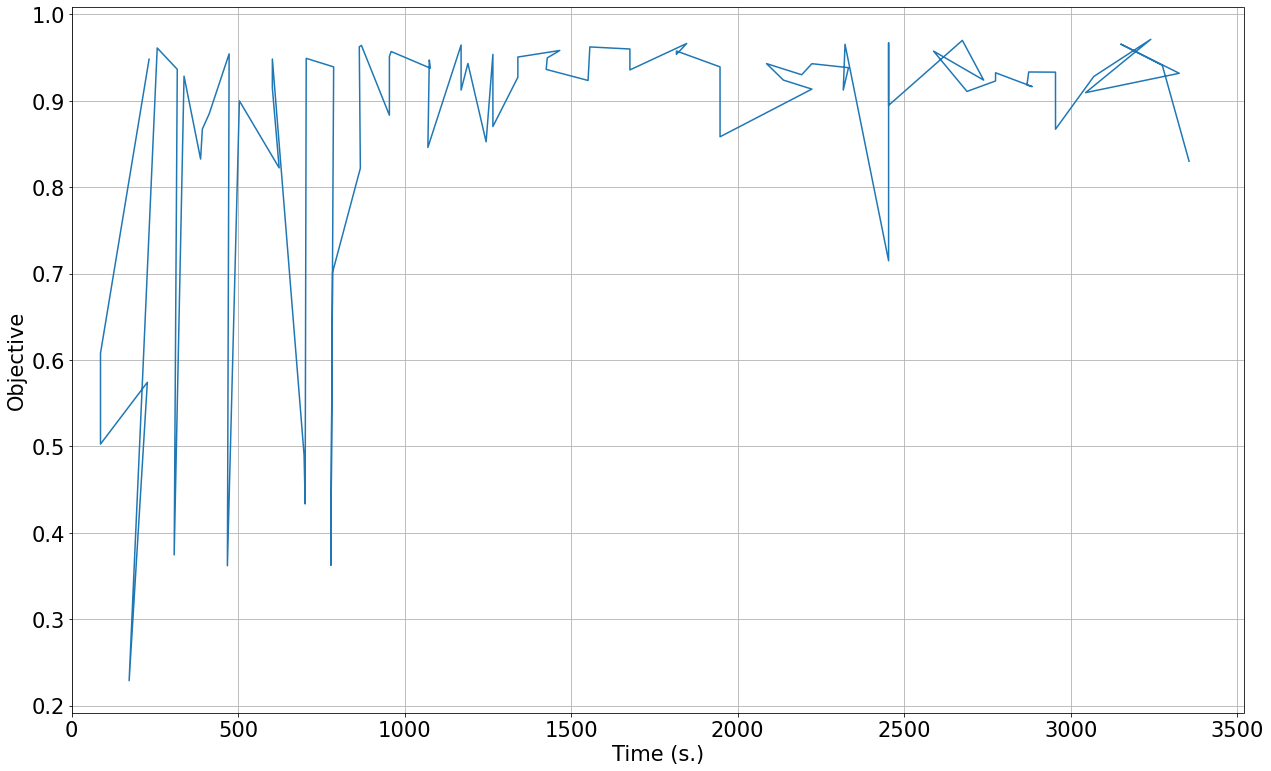

In [4]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(df.elapsed_sec, df.objective)
ax.set_ylabel('Objective')
ax.set_xlabel('Time (s.)')
ax.set_xlim(0)
ax.grid()
fig.show()

## Pairplots

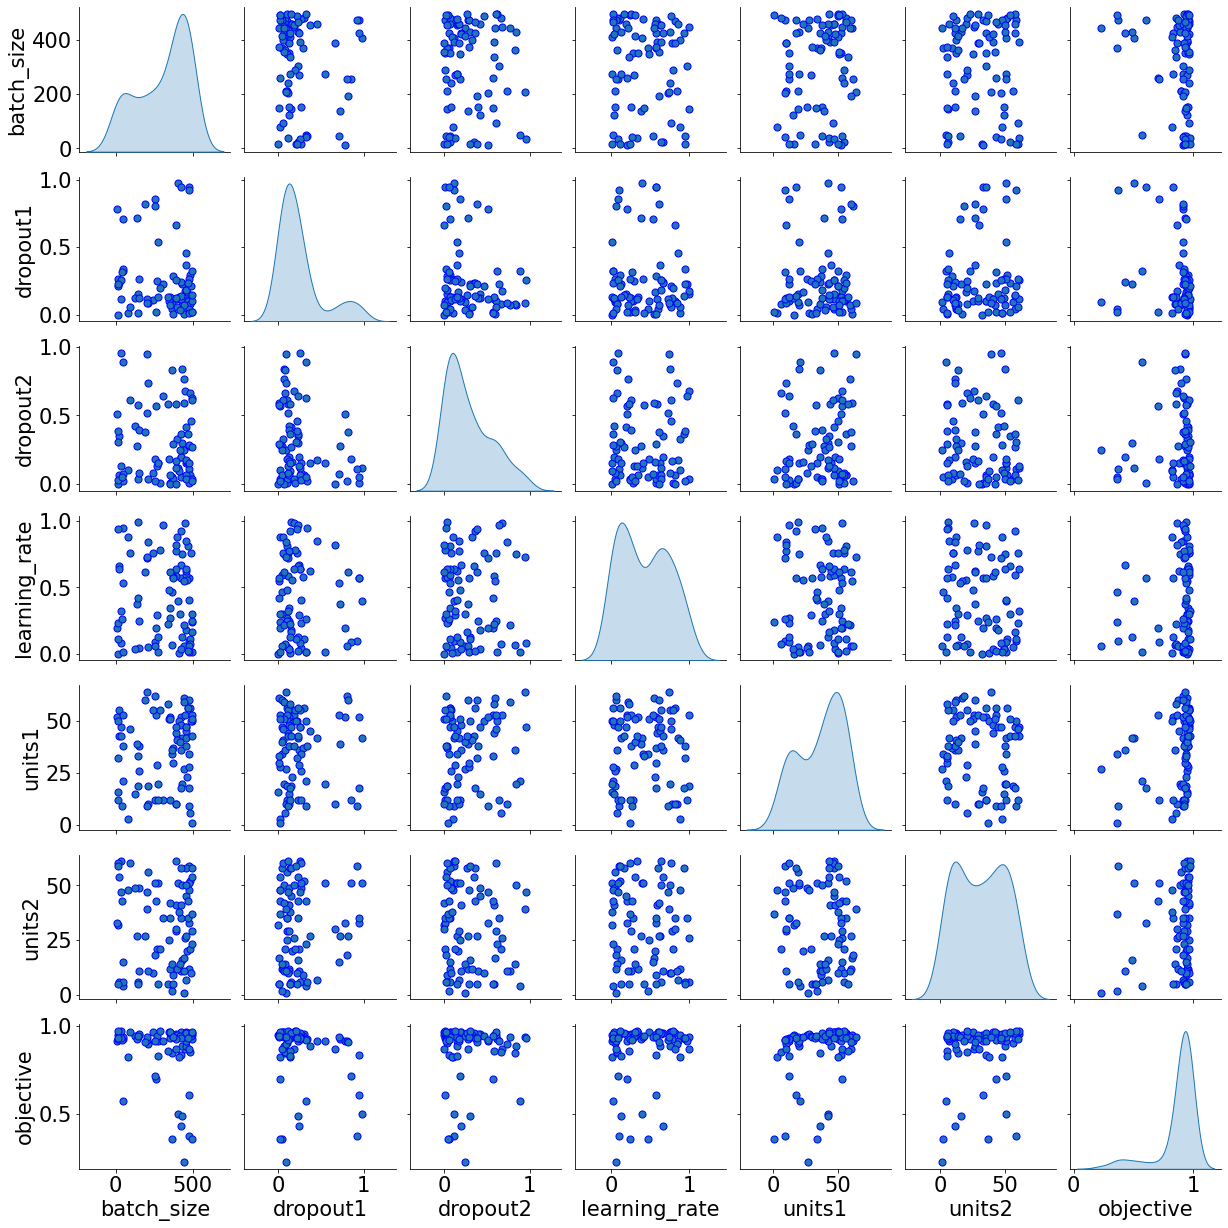

In [7]:
not_include = ['elapsed_sec']
sns.pairplot(df.loc[:, filter(lambda n: n not in not_include, df.columns)],
                diag_kind="kde", markers="o",
                plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                diag_kws=dict(shade=True))
plt.show()

<Figure size 1512x934.487 with 0 Axes>

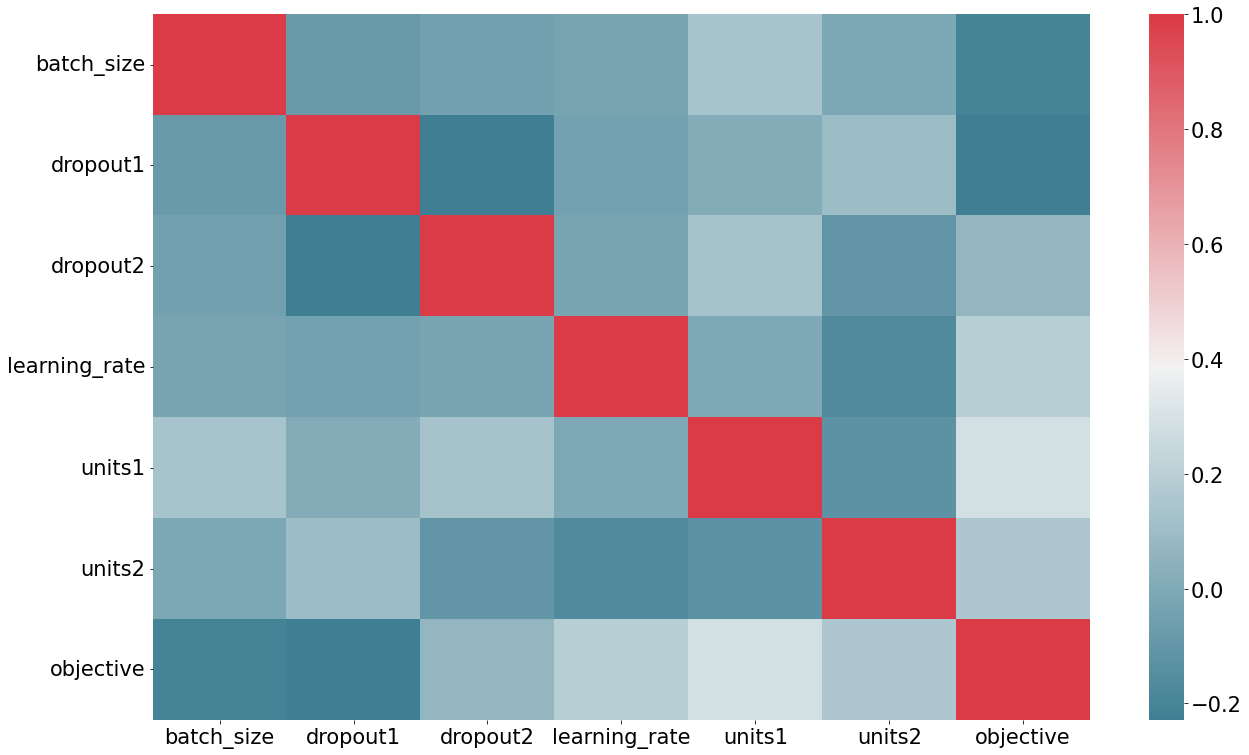

In [6]:
fig = plt.figure()
fig, ax = plt.subplots()
corr = df.loc[:, filter(lambda n: n not in not_include, df.columns)].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)
ax.set_yticklabels(corr.columns, va='center')
plt.show()

## Best objective

In [8]:
i_max = df.objective.idxmax()
df.iloc[i_max]

activation            elu
batch_size             17
dropout1         0.211211
dropout2         0.305783
learning_rate    0.112262
optimizer           Nadam
units1                 50
units2                 59
objective          0.9712
elapsed_sec       3240.46
Name: 77, dtype: object

In [9]:
dict(df.iloc[i_max])

{'activation': 'elu',
 'batch_size': 17,
 'dropout1': 0.21121146317655534,
 'dropout2': 0.3057825612653313,
 'learning_rate': 0.1122622086373296,
 'optimizer': 'Nadam',
 'units1': 50,
 'units2': 59,
 'objective': 0.9711999893188475,
 'elapsed_sec': 3240.456234931946}